<a href="https://colab.research.google.com/github/Gitumbu/Transfer_Training/blob/main/Cifar_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification Using TensorFlow


1. Setup and requirements

In [80]:
#Necessary libraries
#import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt


In [81]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

# Check if any GPUs were found before trying to access them
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU devices found. Using CPU instead.")

Num GPUs Available:  1


In [82]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

2. Loads the CIFAR10 dataset (training and testing sets).


In [83]:

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [84]:
#listing all labels
classes =["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [85]:
#Normalization:Pixel values are scaled between 0 and 1(to improve training)).
X_train = X_train / 255.0
X_test = X_test / 255.0


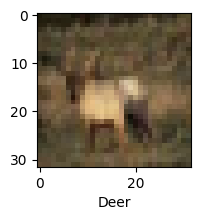

In [86]:
#sample viewing images
def plot_sample(x, y, index):
  plt.figure(figsize=(12,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index][0]]) # Access the first element of the array

plot_sample(X_train, y_train, 3)

In [87]:
#view sample of the data
#RGB values
X_train[1]

array([[[0.60392157, 0.69411765, 0.73333333],
        [0.49411765, 0.5372549 , 0.53333333],
        [0.41176471, 0.40784314, 0.37254902],
        ...,
        [0.35686275, 0.37254902, 0.27843137],
        [0.34117647, 0.35294118, 0.27843137],
        [0.30980392, 0.31764706, 0.2745098 ]],

       [[0.54901961, 0.62745098, 0.6627451 ],
        [0.56862745, 0.6       , 0.60392157],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.37647059, 0.38823529, 0.30588235],
        [0.30196078, 0.31372549, 0.24313725],
        [0.27843137, 0.28627451, 0.23921569]],

       [[0.54901961, 0.60784314, 0.64313725],
        [0.54509804, 0.57254902, 0.58431373],
        [0.45098039, 0.45098039, 0.43921569],
        ...,
        [0.30980392, 0.32156863, 0.25098039],
        [0.26666667, 0.2745098 , 0.21568627],
        [0.2627451 , 0.27058824, 0.21568627]],

       ...,

       [[0.68627451, 0.65490196, 0.65098039],
        [0.61176471, 0.60392157, 0.62745098],
        [0.60392157, 0

3. Preprocessing.

In [88]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

In [89]:
#Transforming classes(categorical values) into one-hotencoding (for multiclass classification).
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

4. Building the Baseline
Model

In [90]:
#CNN model
cifar_model = models.Sequential([ #model architecture
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

#compiling the model
cifar_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#training the model with training dataset.
history=cifar_model.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3719 - loss: 1.9540 - val_accuracy: 0.5463 - val_loss: 1.2851
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5623 - loss: 1.2484 - val_accuracy: 0.5833 - val_loss: 1.1866
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6090 - loss: 1.1120 - val_accuracy: 0.5793 - val_loss: 1.1677
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6349 - loss: 1.0489 - val_accuracy: 0.5513 - val_loss: 1.3530
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6581 - loss: 0.9896 - val_accuracy: 0.6903 - val_loss: 0.8928
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6690 - loss: 0.9519 - val_accuracy: 0.7022 - val_loss: 0.8572
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6796 - loss: 0.9172 - val_accuracy: 0.6702 - val_loss: 0.9575
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6901 - loss: 0.8879 -

In [91]:
#Evaluating the baseline models performance on test set.
test_loss, test_acc =cifar_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7379 - loss: 0.7698
Test accuracy: 0.7347000241279602


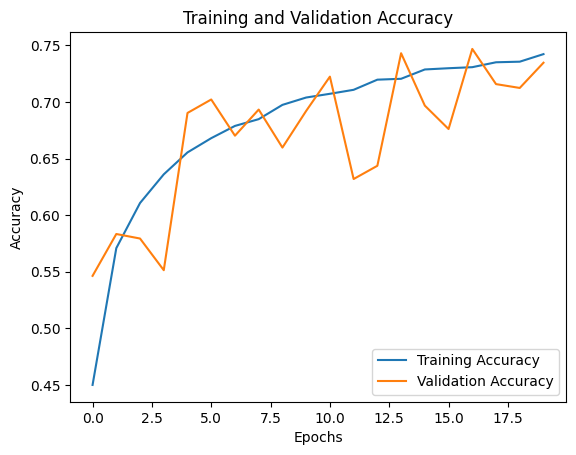

In [92]:
#Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

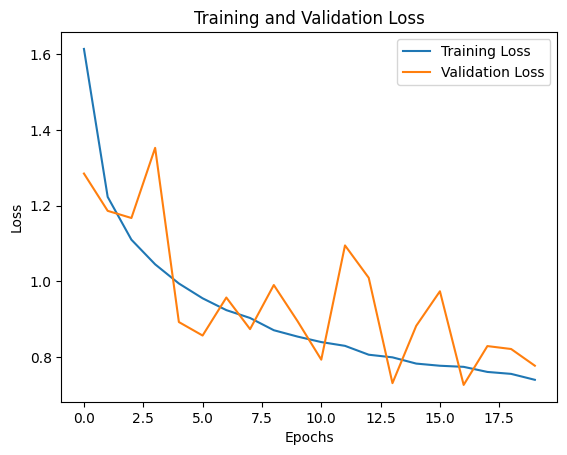

In [93]:
#a plot to show training and validation loss.
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()

In [94]:
#summary(complete architecture of the model)
cifar_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 948,960 (3.62 MB)

 Trainable params: 316,170 (1.21 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 632,342 (2.41 MB)

5. Transfer Learning:

In [95]:
# Load a pre-trained model (e.g., VGG16)
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Fine-tune the top layers
for layer in model.layers[-3:]:
    layer.trainable = True

# Re-compile and re-train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the fine-tuned model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy (fine-tuned):', test_acc)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.4651 - loss: 1.5352 - val_accuracy: 0.5610 - val_loss: 1.2504
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.5827 - loss: 1.1954 - val_accuracy: 0.5778 - val_loss: 1.1997
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6018 - loss: 1.1396 - val_accuracy: 0.5865 - val_loss: 1.1764
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6245 - loss: 1.0824 - val_accuracy: 0.5974 - val_loss: 1.1562
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6330 - loss: 1.0559 - val_accuracy: 0.5992 - val_loss: 1.1495
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6395 - loss: 1.0297 - val_accuracy: 0.6064 - val_loss: 1.1277
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6526 - loss: 0.9971 - val_accuracy: 0.6018 - val_loss: 1.1466
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6558 - loss: 

In [96]:
#comparing of fine-tuned transfer learning model  performance with the baseline and the initial transfer learning model.
#Evaluating the baseline models performance on test set.
test_loss, test_acc =cifar_model.evaluate(X_test, y_test)
print(f'Baseline Model Test Accuracy: {test_acc}')
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Evaluate the fine-tuned model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy (fine-tuned):', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7379 - loss: 0.7698
Baseline Model Test Accuracy: 0.7347000241279602
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6226 - loss: 1.0892
Test accuracy: 0.6241000294685364
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6226 - loss: 1.0892
Test accuracy (fine-tuned): 0.6241000294685364


In [97]:
!pip install fastapi
!pip install python-multipart

In [98]:
from fastapi import FastAPI, File, UploadFile
from fastapi.responses import HTMLResponse
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from PIL import Image

# Initialize FastAPI app
app = FastAPI()

# Load the pre-trained model (fine-tuned model from your code)
model = tf.keras.models.load_model("model.h5")  # Save and load your trained model accordingly

# Define the class labels (adjust according to your dataset)
class_labels = ["Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"]

# Define the folder for uploaded images
UPLOAD_FOLDER = "uploads"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)

@app.get("/", response_class=HTMLResponse)
async def index():
    return """
    <html>
        <head>
            <title>Image Classifier</title>
        </head>
        <body>
            <h1>Upload an Image for Classification</h1>
            <form action="/predict" method="post" enctype="multipart/form-data">
                <input type="file" name="file" />
                <input type="submit" value="Upload" />
            </form>
        </body>
    </html>
    """

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    try:
        # Save the uploaded file
        filepath = os.path.join(UPLOAD_FOLDER, file.filename)
        with open(filepath, "wb") as f:
            f.write(await file.read())

        # Preprocess the image
        img = Image.open(filepath).resize((32, 32))
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalize the image

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions[0])
        predicted_label = class_labels[predicted_class]

        return {"Predicted Class": predicted_label}
    except Exception as e:
        return {"error": str(e)}
